#Cointegeration Test

## Collect Data for Pairs Trading

In [1]:
#install pandas-datareader package with pip
#!pip install pandas-datareader

In [2]:
#import libraries
import datetime as dt
import math

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sn

import pandas as pd
import pandas_datareader as web

import numpy as np
import statsmodels
from statsmodels.tsa.stattools import coint

np.random.seed(107)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
start = dt.date(2019,1,1)
end = dt.date.today()

In [4]:
symbol_list = ['IG', 'NVS', 'CPHD', 'PBH', 'GNC', 'JNJ', 'PFE', 'MRTX','SPX']

df_stock_prices = pd.DataFrame()

In [5]:
for symbol in symbol_list:
  try:
    df = web.DataReader(symbol, 'yahoo', start, end)
    df_stock_prices[symbol] = df['Adj Close']
  except:
    pass

In [6]:
df_stock_prices.head()

,IG,NVS,PBH,GNC,JNJ,PFE,MRTX
Date,,,,,,,
2019-01-02,21.863684,70.406586,30.709999,2.51,121.799690,38.012341,44.650002
2019-01-03,21.863684,70.976135,30.209999,2.50,119.864243,36.948875,43.650002
2019-01-04,21.863684,71.939354,31.379999,2.55,121.875969,37.792622,44.990002
2019-01-07,21.915400,71.093399,31.440001,2.62,121.094154,37.994766,48.279999
2019-01-08,21.915400,72.634537,31.719999,2.68,123.906761,38.170547,50.889999


## Cointegeration Test for Choosing Pairs

Dickey Fuller test is a hypothesis test which gives pValue as the result. If this value is less than 0.05 or 0.01, we can say with 95% or 99% confidence that the signal is stationary and we can choose this pair.

The assumption we have here is: these two stocks have cointegration(confidence coefficiency I set is 95%) which is measured by p-value. If p-value <= 0.05 then we cannot reject the hypothesis.

In [7]:
def find_cointegrated_pairs(stockprice_data):
  symb = list(df_stock_prices.columns)
  n = len(symb)
  score_matrix = np.zeros((n,n))
  pvalue_matrix = np.ones((n,n))
  pairs = []

  for i in range(n):
    for j in range(i+1, n):
      S1 = stockprice_data[symb[i]]
      S2 = stockprice_data[symb[j]]
      S1 = S1.fillna(S1.mean())
      S2 = S2.fillna(S2.mean())
      result = coint(S1,S2)
      score = result[0]
      pvalue = result[1]
      score_matrix[i,j] = score
      pvalue_matrix[i,j] = pvalue

      if(pvalue < 0.01):
        pairs.append((S1,S2,symb[i], symb[j]))
  return score_matrix, pvalue_matrix, pairs

In [8]:
score, pvalue, _ = find_cointegrated_pairs(df_stock_prices)

In [9]:
pvalue

array([[1.        , 0.83653945, 0.60971676, 0.38801821, 0.62308292,
        0.56589865, 0.27774957],
       [1.        , 1.        , 0.02217366, 0.05572334, 0.11536305,
        0.06112869, 0.1108841 ],
       [1.        , 1.        , 1.        , 0.50702847, 0.50441895,
        0.257325  , 0.57524332],
       [1.        , 1.        , 1.        , 1.        , 0.0919922 ,
        0.77808501, 0.87120502],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        0.36867612, 0.06605627],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.08869373],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        ]])

We run the test on the set and the result is below:

##pvalue cross-matrix

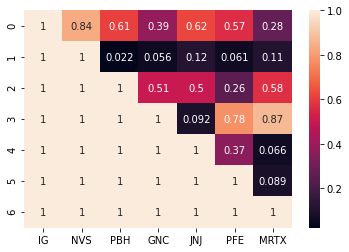

In [10]:
df_pvalue = pd.DataFrame(pvalue, columns=list(df_stock_prices.columns))
sn.heatmap(df_pvalue, annot=True)
plt.show()

The p-value of NVS and MRTX set 0.11, which is smaller than 0.05 so we cannot reject the null hypothesis.(These stocks have cointegeration relationship.)

# Kalman Filter Application

In [11]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as smt
sns.set(style='ticks', context='talk')

Random walk

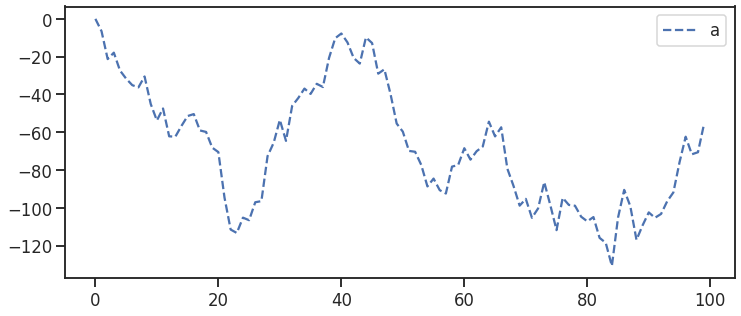

In [12]:
sigma_h = 10.0
h = np.random.normal(0, sigma_h, 110)
h[0] = 0.0
a = np.cumsum(h)

df = pd.DataFrame(a[0:100], columns=['a'])
_=df.plot(figsize=(12,5), style='b--')

Now we introduce a second time series that's just the original series, plus some noise:

$$
\begin{align}
y_t & = \alpha_t + \varepsilon_t \qquad & \varepsilon_t \sim
    N(0, \sigma_\varepsilon^2) \\
\end{align}
$$


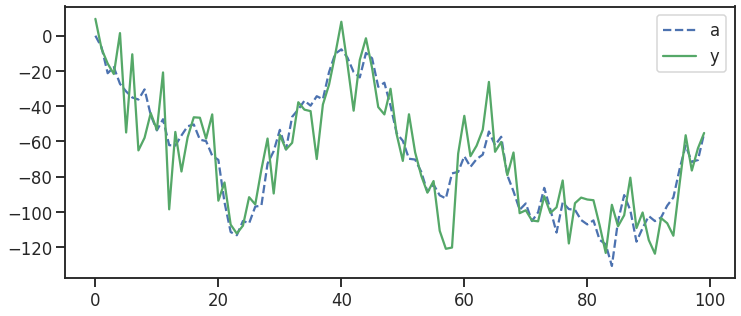

In [13]:
sigma_e = 15.
e = np.random.normal(0, sigma_e, 110)
df['y'] = a[0:100] + e[0:100]
_=df.plot(figsize=(12,5), style=['b--', 'g-',])

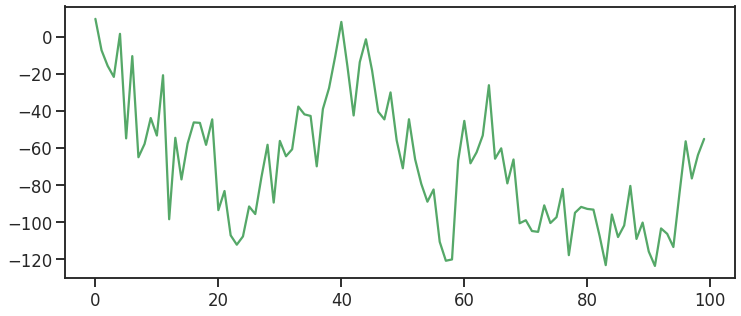

In [14]:
_=df.y.plot(figsize=(12,5), style=['g-',])

If we can only observe _y_, what can we say about &alpha;?


## Examples of State Space Systems
<table style="width:100%;">
<tr> <th style="padding:10px;"> State </th> <th> Observation </th></tr>
<tr> <td style="padding:10px;"> Signal </td> <td> Signal + Noise </td> </tr>
<tr> <td style="padding:10px;"> Position, Velocity </td> <td> Measurement from sensor </td> </tr>
<tr> <td style="padding:10px;"> Commodity price </td> <td> Futures price </td> </tr>
<tr> <td style="padding:10px;"> Position of cursor on screen </td> <td> Position of finger on trackpad </td> </tr>
</table>

In [15]:
"""
- _T_ is transition matrix
- _Q_ is state covariance
- _Z_ is design matrix
- _H_ is observation covariance
- _R_ is selection matrix
"""

from statsmodels.tsa.statespace.kalman_filter import KalmanFilter

kf = KalmanFilter(1,1)

kf.obs_cov = np.array([sigma_e]) # H
kf.state_cov = np.array([sigma_h])  # Q
kf.design = np.array([1.0])  # Z
kf.transition = np.array([1.0])  # T
kf.selection = np.array([1.0])  # R

ys, ah = kf.simulate(100)

- This is just a simulation of our state space model given the parameters we've provided

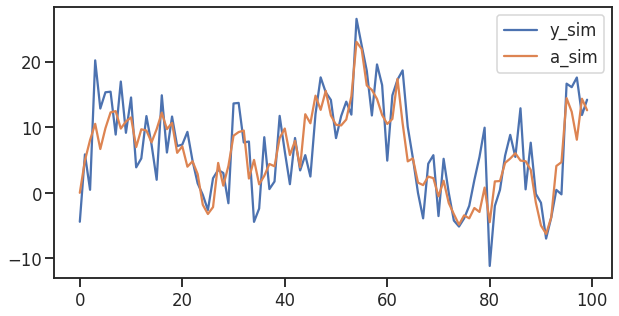

In [16]:
pd.DataFrame({'y_sim': ys.flatten(), 'a_sim': ah.flatten()}).plot(figsize=(10,5))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


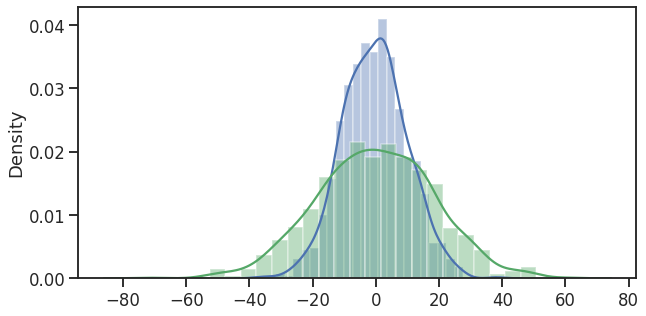

In [17]:
v_next = []
a_dist = np.random.normal(0, sigma_h, 1000)
a_1 = 0.
for i in range(1000):
    a_next = a_1 + np.random.normal(0, sigma_h)
    v_next.append(a_next + np.random.normal(0, sigma_e))
fig, ax = plt.subplots(figsize=(10,5))
_=sns.distplot(a_dist, color='b', label='alpha', ax=ax)
_=sns.distplot(v_next, color='g', label='vt', ax=ax)

- The blue distribution is a simulation of our best guess of the next state
- The green distribution is a simulation of the distribution of the innovation (which here is also the distribution of y_t since a_t is 0)

## Regression Lemma

In [18]:
# Initialize known state
kf.initialize_known(np.array([0.0]), np.array([[sigma_h]]))
# Bind data
y = a + e
kf.bind(y.copy())
r = kf.filter()


$$
\begin{align}
\sigma_{\alpha_t v_t} & = Cov(\alpha_t,v_t|Y_{t}) \\
& = E[(\alpha_t - a_t)(v_t - 0)] \\
& = E[(\alpha_t - a_t)(\alpha_t + \epsilon_t - a_t)] = P_t
\end{align}
$$

$$
\begin{align}
E(\alpha_t|v_t) & = a_t + \frac{P_t}{P_t + \sigma^2_\epsilon}(y_t-a_t) &  Var(\alpha_t|v_t) & = \frac{P_t}{P_t+\sigma^2_\epsilon} \\
\end{align}
$$

This ratio:
$$
\boxed{ K = \frac{P_t}{P_t + \sigma^2_\epsilon} }
$$

is called the _Kalman gain_

- Apply the lemma to alpha_t and v_t (given Y_t).
- The covariance gives us the relationship between the observed variable and the state
- Since the noise in the observation is assumed to be independent of the variance in the state, the covariance is Pt
- If the noise in the observation is small, then the Kalman gain is near one and tells us to adjust our state to near the observation
- If the noise is large compared to variance in state, then we're better off staying near a_t
- This lemma shows that the Kalman filter is the _optimal_ estimator for the linear and Gaussian case

##Filtering
- Filtering improves our estimate of the current state given the latest observation (optimally).
- We are really determining a new conditional distribution of the state

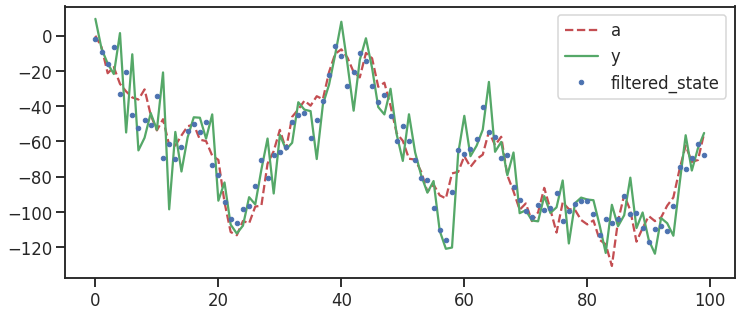

In [19]:
df['filtered_state'] = r.filtered_state[0][1:101]
df[['a', 'y', 'filtered_state']].plot(figsize=(12,5), style=['r--', 'g-', 'b.'])

##Forecasting

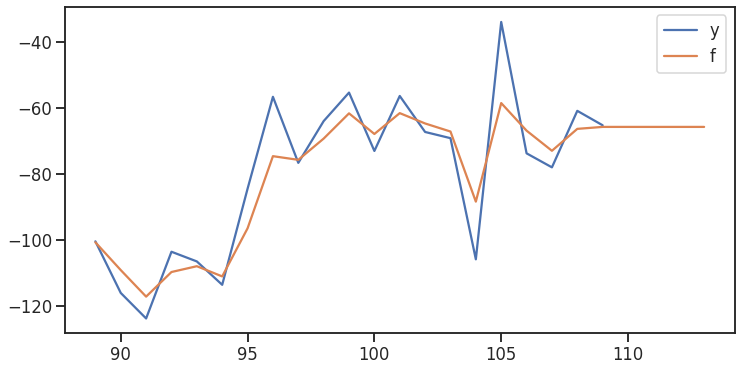

In [20]:
p = r.predict(90, 115, dynamic=20)
s_f = pd.Series(p.results.forecasts[0][1:])
s_y = pd.Series(y)
pd.DataFrame({'y':s_y, 'f':s_f}).iloc[-25:].plot(figsize=(12,6))